# Taller OpenCV

### Instalar librerías

In [14]:
%pip install opencv-python numpy matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Librerías a usar

In [15]:
# Import necessary libraries
import cv2  # OpenCV for image processing
import matplotlib.image as mpi  # Matplotlib's image module to read images
import matplotlib.pyplot as plt  # Matplotlib to display images
import numpy as np  # NumPy for numerical operations on images

### Funciones útiles

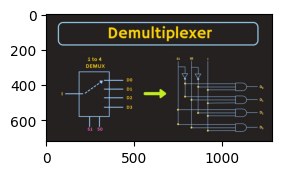

In [16]:
# Utility function to load an image from a file
def img(file):
    datos = mpi.imread(file)  # Reads the image file
    return datos  # Returns the image data as a NumPy array


# Utility function to display an image
def show(datos):
    f = plt.figure()  # Creates a new figure
    f.add_subplot(1, 2, 1)  # Adds a subplot to the figure
    plt.imshow(datos)  # Displays the image data
    plt.show()  # Renders the figure


# Load and display an image called "demux.jpg"
im = img("demux.jpg")  # Load the image into 'im'
show(im)  # Display the loaded image

### ¡Juguemos!

En esta sección se explicarán los conceptos básicos de manipulación de imagenes. Y también está libre a uso personal. Estos datos se pueden modificar para experimentar.


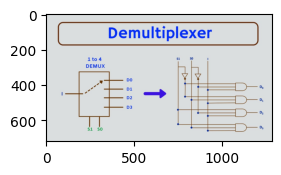

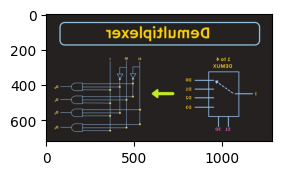

In [17]:
# Function to create a negative of an image
def negative(imagen):
    height = imagen.shape[0]  # Image height
    width = imagen.shape[1]  # Image width
    # Create a new empty image with the same dimensions
    img = np.zeros((height, width, 3), dtype=int)
    # Loop over all pixels and invert the color
    for i in range(height):
        for j in range(width):
            img[i][j][0] = 255 - imagen[i][j][0]  # Invert Red
            img[i][j][1] = 255 - imagen[i][j][1]  # Invert Green
            img[i][j][2] = 255 - imagen[i][j][2]  # Invert Blue
    return img  # Return the negative image


# Function to mirror an image horizontally
def mirror(imagen):
    height = imagen.shape[0]  # Image height
    width = imagen.shape[1]  # Image width
    img = np.zeros((height, width, 3), dtype=int)  # New empty image
    for i in range(width):
        for j in range(height):
            img[j][width - i - 1] = imagen[j][i]  # Copy pixels in reversed order
    return img  # Return the mirrored image


def rotate90(imagen):
    height = imagen.shape[0]
    width = imagen.shape[1]
    img = np.zeros((alto, width, 3), dtype=int)
    for i in range(height):
        for j in range(ancho):
            img[j][i][0] = imagen[i][j][0]
            img[j][i][1] = imagen[i][j][1]
            img[j][i][2] = imagen[i][j][2]
    return img


def grayScale(imagen):
    height = imagen.shape[0]
    width = imagen.shape[1]
    img = np.zeros((height, width, 3), dtype=int)
    for i in range(height):
        for j in range(width):
            elemento1 = imagen[i][j][0]
            elemento2 = imagen[i][j][1]
            elemento3 = imagen[i][j][2]
            prom = elemento1 + elemento2 + elemento3 / imagen.shape[2]
            for k in range(3):
                img[i][j][k] = prom
    return img


def minimo_divisor_mayor_a_uno(num):
    if num % 2 == 0:
        return 2
    else:
        div = 3
        for i in range(3, num, 2):
            if num % i == 0:
                div = i
                break
    return div


def meanImage(col_incio, fil_incio, col_final, fil_fin, imagen):
    rprom = 0
    gprom = 0
    bprom = 0
    total_pixeles = (col_final - col_incio) * (fil_fin - fil_incio)
    for i in range(fil_incio, fil_fin + 1):
        for j in range(col_incio, col_final + 1):
            # color = promedio_para_img(i,j,i+alto,j+ancho,img)
            rprom += imagen[i][j][0]
            gprom += imagen[i][j][1]
            bprom += imagen[i][j][2]
    rprom /= total_pixeles
    gprom /= total_pixeles
    bprom /= total_pixeles
    return [rprom, gprom, bprom]


def pixelar(imagen):
    height = imagen.shape[0]
    width = imagen.shape[1]
    altojump = minimo_divisor_mayor_a_uno(imagen.shape[0])
    anchojump = minimo_divisor_mayor_a_uno(imagen.shape[1])

    img = np.zeros((height, width, 3), dtype=int)
    for i in range(altojump, height):
        for j in range(anchojump, width):
            color = meanImage(i, j, i + altojump, j + anchojump, imagen)
            for x in range(i, i + altojump + 1):
                for c in range(j, j + anchojump + 1):
                    img[x][c] = color
    return img


def moreBrightness(imagen, factor):
    height = imagen.shape[0]
    width = imagen.shape[1]
    img = np.zeros((height, width, 3), dtype=int)
    for i in range(height):
        for j in range(width):
            for k in range(3):
                img[i][j][k] = imagen[i][j][k] * factor
    return img


show(negative(im))
show(mirror(im))